In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 300)
pd.set_option("max_colwidth", 200)

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from numpy import arange
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn import preprocessing

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.feature_selection import SequentialFeatureSelector

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

import matplotlib.pyplot as plt
import statistics

import seaborn as sns

In [2]:
MLR = LinearRegression()

In [3]:
base = pd.read_csv('../../Data/BaseData.csv')

In [4]:
X = base.drop(['SalePrice'], axis=1).values
y = base.SalePrice.values

In [5]:
len(y)

2580

In [6]:
X.shape

(2580, 298)

In [7]:
X.shape[1]

298

In [8]:
AR2_Base = []
MAE_Base = []

for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)
    MLR.fit(X_train, y_train)
    pred = MLR.predict(X_test)
    
    Adj_r2 = 1 - (1-r2_score(y_test, pred)) * (len(y)-1)/(len(y)-X.shape[1]-1)
    AR2_Base.append(Adj_r2)
    
    mae = mean_absolute_error(y_test, pred)
    MAE_Base.append(mae)

In [9]:
PositiveAR2 = []
NegativeAR2 = []

for i in AR2_Base:
    if i < 0:
        NegativeAR2.append(i)
    else:
        PositiveAR2.append(i)

In [10]:
Base = pd.DataFrame({'AR2_Base': AR2_Base, 'MAE_Base': MAE_Base})

In [11]:
Base

,AR2_Base,MAE_Base
0,-8.534797e+05,2.625782e+06
1,-5.175965e+04,6.479588e+05
2,9.037409e-01,1.456224e+04
3,8.452027e-01,1.499799e+04
4,8.596291e-01,1.570855e+04
...,...,...
95,-1.615332e+07,1.146723e+07
96,9.070319e-01,1.494734e+04
97,8.449961e-01,1.536473e+04
98,9.013963e-01,1.519879e+04


In [12]:
Base = Base[Base.AR2_Base > 0]
Base

,AR2_Base,MAE_Base
2,0.903741,14562.244921
3,0.845203,14997.992436
4,0.859629,15708.554162
5,0.900190,15058.701352
6,0.887281,14761.904769
...,...,...
94,0.881848,14956.209868
96,0.907032,14947.338542
97,0.844996,15364.734135
98,0.901396,15198.791947


In [13]:
base_drop1 = pd.read_csv('BaseDrop1.csv')

In [14]:
base_drop1.shape

(2579, 300)

In [15]:
X2 = base_drop1.drop(['SalePrice'], axis=1).values
y2 = base_drop1.SalePrice.values

In [16]:
len(y2)

2579

In [17]:
X2.shape

(2579, 299)

In [18]:
X2.shape[1]

299

In [19]:
AR2_Drop1 = []
MAE_Drop1 = []

for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X2,y2,test_size=0.25)
    MLR.fit(X_train, y_train)
    pred = MLR.predict(X_test)
    
    Adj_r2 = 1 - (1-r2_score(y_test, pred)) * (len(y)-1)/(len(y)-X.shape[1]-1)
    AR2_Drop1.append(Adj_r2)
    
    mae = mean_absolute_error(y_test, pred)
    MAE_Drop1.append(mae)

In [20]:
BaseDrop1 = pd.DataFrame({'AR2_Drop1': AR2_Drop1, 'MAE_Drop1': MAE_Drop1})

In [21]:
BaseDrop1

,AR2_Drop1,MAE_Drop1
0,-302864.347628,1.581699e+06
1,-103907.201740,9.698099e+05
2,0.911570,1.393235e+04
3,-117114.786671,1.039703e+06
4,0.904123,1.538196e+04
...,...,...
95,0.911688,1.509429e+04
96,0.922054,1.398703e+04
97,0.898604,1.422945e+04
98,0.896679,1.569358e+04


In [22]:
BaseDrop1 = BaseDrop1[BaseDrop1.AR2_Drop1 > 0]
BaseDrop1

,AR2_Drop1,MAE_Drop1
2,0.911570,13932.352735
4,0.904123,15381.955857
5,0.905195,15247.583078
6,0.913103,14411.544391
7,0.904199,13903.364653
...,...,...
95,0.911688,15094.293038
96,0.922054,13987.031822
97,0.898604,14229.448980
98,0.896679,15693.583129


In [23]:
box = pd.concat([Base, BaseDrop1], axis=1)
box

,AR2_Base,MAE_Base,AR2_Drop1,MAE_Drop1
2,0.903741,14562.244921,0.911570,13932.352735
3,0.845203,14997.992436,NaN,NaN
4,0.859629,15708.554162,0.904123,15381.955857
5,0.900190,15058.701352,0.905195,15247.583078
6,0.887281,14761.904769,0.913103,14411.544391
...,...,...,...,...
95,NaN,NaN,0.911688,15094.293038
96,0.907032,14947.338542,0.922054,13987.031822
97,0.844996,15364.734135,0.898604,14229.448980
98,0.901396,15198.791947,0.896679,15693.583129


In [24]:
box.describe()

,AR2_Base,MAE_Base,AR2_Drop1,MAE_Drop1
count,81.000000,81.000000,76.000000,76.000000
mean,0.884714,14982.467958,0.903198,14727.288328
std,0.036129,599.487200,0.015947,761.299488
min,0.723978,13874.263154,0.846662,13563.144308
25%,0.866773,14562.244921,0.896254,14262.889082
50%,0.898155,14956.209868,0.906875,14586.211531
75%,0.908028,15303.552479,0.914338,15096.746242
max,0.922780,16612.501822,0.922097,18097.116753


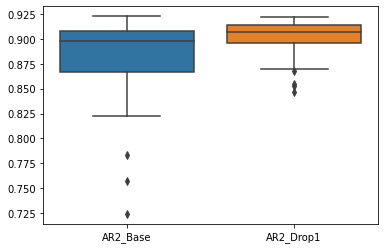

In [25]:
sns.boxplot(data=box[['AR2_Base','AR2_Drop1']]);

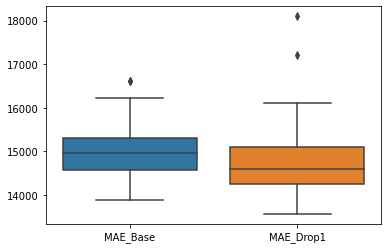

In [26]:
sns.boxplot(data=box[['MAE_Base', 'MAE_Drop1']]);